## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [7]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Momentum = 0.70
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions 

50000/50000 [==============================] - 8s 161us/step - loss: 0.8022 - acc: 0.7120 - val_loss: 1.9415 - val_acc: 0.4606
Epoch 49/50
50000/50000 [==============================] - 8s 162us/step - loss: 0.7954 - acc: 0.7124 - val_loss: 1.8849 - val_acc: 0.4800
Epoch 50/50
50000/50000 [==============================] - 8s 160us/step - loss: 0.7930 - acc: 0.7116 - val_loss: 1.9702 - val_acc: 0.4661
Experiment with LR = 0.100000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense

50000/50000 [==============================] - 9s 170us/step - loss: 1.1420 - acc: 0.5932 - val_loss: 1.6579 - val_acc: 0.4619
Epoch 50/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.1369 - acc: 0.5944 - val_loss: 1.6514 - val_acc: 0.4625
Experiment with LR = 0.100000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)             

50000/50000 [==============================] - 7s 145us/step - loss: 1.4145 - acc: 0.5025 - val_loss: 1.5978 - val_acc: 0.4476
Experiment with LR = 0.100000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9679 - acc: 0.2921 - val_loss: 1.8525 - val_acc: 0.3422
Epoch 2/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.7726 - acc: 0.3703 - val_loss: 1.7094 - val_acc: 0.3941
Epoch 3/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.6870 - acc: 0.4018 - val_loss: 1.6713 - val_acc: 0.3988
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6275 - acc: 0.4258 - val_loss: 1.7348 - val_acc: 0.3890
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5853 - acc: 0.4415 - val_loss: 1.5943 - val_acc: 0.4341
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5447 - acc: 0.4534 - val_loss: 1.7335 - val_acc: 0.3882
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5135 - acc: 0.4649 - val_loss: 1.5286 - 

Epoch 2/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6491 - acc: 0.4168 - val_loss: 1.6088 - val_acc: 0.4314
Epoch 3/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5623 - acc: 0.4443 - val_loss: 1.5792 - val_acc: 0.4331
Epoch 4/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4904 - acc: 0.4707 - val_loss: 1.5025 - val_acc: 0.4642
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4425 - acc: 0.4901 - val_loss: 1.4508 - val_acc: 0.4835
Epoch 6/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4004 - acc: 0.5049 - val_loss: 1.4151 - val_acc: 0.5015
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.3656 - acc: 0.5158 - val_loss: 1.5067 - val_acc: 0.4683
Epoch 8/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3313 - acc: 0.5262 - val_loss: 1.4524 - val_acc: 0.4761
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 133us/step - loss: 1.5083 - acc: 0.4659 - val_loss: 1.5147 - val_acc: 0.4592
Epoch 4/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4511 - acc: 0.4828 - val_loss: 1.5121 - val_acc: 0.4597
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4050 - acc: 0.5018 - val_loss: 1.4479 - val_acc: 0.4881
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3602 - acc: 0.5145 - val_loss: 1.4304 - val_acc: 0.4938
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.3237 - acc: 0.5307 - val_loss: 1.4423 - val_acc: 0.4856
Epoch 8/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.2864 - acc: 0.5441 - val_loss: 1.3562 - val_acc: 0.5187
Epoch 9/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2538 - acc: 0.5547 - val_loss: 1.4438 - val_acc: 0.4901
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 134us/step - loss: 1.4676 - acc: 0.4759 - val_loss: 1.4676 - val_acc: 0.4790
Epoch 5/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4229 - acc: 0.4902 - val_loss: 1.5105 - val_acc: 0.4694
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4018 - acc: 0.4989 - val_loss: 1.4595 - val_acc: 0.4742
Epoch 7/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.3671 - acc: 0.5129 - val_loss: 1.4418 - val_acc: 0.4912
Epoch 8/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3387 - acc: 0.5233 - val_loss: 1.4616 - val_acc: 0.4908
Epoch 9/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.3088 - acc: 0.5314 - val_loss: 1.4746 - val_acc: 0.4776
Epoch 10/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2917 - acc: 0.5378 - val_loss: 1.4406 - val_acc: 0.4929
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 7s 134us/step - loss: 1.8653 - acc: 0.3494 - val_loss: 1.8575 - val_acc: 0.3451
Epoch 6/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.8350 - acc: 0.3598 - val_loss: 1.8267 - val_acc: 0.3593
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8103 - acc: 0.3700 - val_loss: 1.8050 - val_acc: 0.3651
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7888 - acc: 0.3767 - val_loss: 1.7826 - val_acc: 0.3768
Epoch 9/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7695 - acc: 0.3834 - val_loss: 1.7697 - val_acc: 0.3866
Epoch 10/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7524 - acc: 0.3893 - val_loss: 1.7510 - val_acc: 0.3868
Epoch 11/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7361 - acc: 0.3969 - val_loss: 1.7323 - val_acc: 0.3941
Epoch 12/50
50000/50000 [==================

50000/50000 [==============================] - 7s 134us/step - loss: 1.6714 - acc: 0.4174 - val_loss: 1.6627 - val_acc: 0.4176
Epoch 7/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6442 - acc: 0.4256 - val_loss: 1.6424 - val_acc: 0.4212
Epoch 8/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.6181 - acc: 0.4355 - val_loss: 1.6198 - val_acc: 0.4304
Epoch 9/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5945 - acc: 0.4428 - val_loss: 1.6053 - val_acc: 0.4359
Epoch 10/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5721 - acc: 0.4510 - val_loss: 1.5794 - val_acc: 0.4388
Epoch 11/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5511 - acc: 0.4586 - val_loss: 1.5567 - val_acc: 0.4515
Epoch 12/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5314 - acc: 0.4659 - val_loss: 1.5481 - val_acc: 0.4500
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 7s 131us/step - loss: 1.5351 - acc: 0.4620 - val_loss: 1.5371 - val_acc: 0.4549
Epoch 8/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5058 - acc: 0.4735 - val_loss: 1.5149 - val_acc: 0.4675
Epoch 9/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4774 - acc: 0.4834 - val_loss: 1.4982 - val_acc: 0.4672
Epoch 10/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4534 - acc: 0.4914 - val_loss: 1.5232 - val_acc: 0.4580
Epoch 11/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.4297 - acc: 0.4994 - val_loss: 1.4788 - val_acc: 0.4703
Epoch 12/50
50000/50000 [==============================] - 6s 130us/step - loss: 1.4059 - acc: 0.5078 - val_loss: 1.4471 - val_acc: 0.4854
Epoch 13/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.3856 - acc: 0.5153 - val_loss: 1.4543 - val_acc: 0.4856
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 7s 136us/step - loss: 1.3268 - acc: 0.5313 - val_loss: 1.4028 - val_acc: 0.5042
Epoch 9/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.2977 - acc: 0.5425 - val_loss: 1.3855 - val_acc: 0.5084
Epoch 10/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.2655 - acc: 0.5515 - val_loss: 1.3841 - val_acc: 0.5057
Epoch 11/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2471 - acc: 0.5597 - val_loss: 1.3756 - val_acc: 0.5141
Epoch 12/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.2208 - acc: 0.5696 - val_loss: 1.3619 - val_acc: 0.5173
Epoch 13/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.1919 - acc: 0.5781 - val_loss: 1.3503 - val_acc: 0.5238
Epoch 14/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.1620 - acc: 0.5875 - val_loss: 1.3653 - val_acc: 0.5161
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 6s 127us/step - loss: 2.1088 - acc: 0.2628 - val_loss: 2.1019 - val_acc: 0.2692
Epoch 10/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.0945 - acc: 0.2679 - val_loss: 2.0883 - val_acc: 0.2719
Epoch 11/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.0812 - acc: 0.2730 - val_loss: 2.0755 - val_acc: 0.2789
Epoch 12/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.0686 - acc: 0.2775 - val_loss: 2.0634 - val_acc: 0.2812
Epoch 13/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.0569 - acc: 0.2812 - val_loss: 2.0520 - val_acc: 0.2866
Epoch 14/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.0459 - acc: 0.2857 - val_loss: 2.0414 - val_acc: 0.2888
Epoch 15/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.0354 - acc: 0.2884 - val_loss: 2.0314 - val_acc: 0.2922
Epoch 16/50
50000/50000 [==============

50000/50000 [==============================] - 7s 134us/step - loss: 1.9301 - acc: 0.3268 - val_loss: 1.9233 - val_acc: 0.3331
Epoch 11/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.9150 - acc: 0.3323 - val_loss: 1.9097 - val_acc: 0.3346
Epoch 12/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.9020 - acc: 0.3360 - val_loss: 1.8982 - val_acc: 0.3395
Epoch 13/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8900 - acc: 0.3398 - val_loss: 1.8871 - val_acc: 0.3477
Epoch 14/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8796 - acc: 0.3438 - val_loss: 1.8771 - val_acc: 0.3473
Epoch 15/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8700 - acc: 0.3469 - val_loss: 1.8680 - val_acc: 0.3466
Epoch 16/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.8607 - acc: 0.3499 - val_loss: 1.8597 - val_acc: 0.3543
Epoch 17/50
50000/50000 [==============

50000/50000 [==============================] - 7s 132us/step - loss: 1.8178 - acc: 0.3657 - val_loss: 1.8148 - val_acc: 0.3650
Epoch 12/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.8034 - acc: 0.3709 - val_loss: 1.8006 - val_acc: 0.3746
Epoch 13/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7907 - acc: 0.3756 - val_loss: 1.7888 - val_acc: 0.3806
Epoch 14/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7783 - acc: 0.3793 - val_loss: 1.7771 - val_acc: 0.3796
Epoch 15/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7672 - acc: 0.3842 - val_loss: 1.7671 - val_acc: 0.3848
Epoch 16/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.7566 - acc: 0.3877 - val_loss: 1.7566 - val_acc: 0.3890
Epoch 17/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7463 - acc: 0.3903 - val_loss: 1.7463 - val_acc: 0.3919
Epoch 18/50
50000/50000 [==============

50000/50000 [==============================] - 7s 135us/step - loss: 1.5803 - acc: 0.4475 - val_loss: 1.5819 - val_acc: 0.4454
Epoch 13/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5609 - acc: 0.4538 - val_loss: 1.5645 - val_acc: 0.4526
Epoch 14/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5440 - acc: 0.4628 - val_loss: 1.5493 - val_acc: 0.4574
Epoch 15/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5281 - acc: 0.4672 - val_loss: 1.5410 - val_acc: 0.4567
Epoch 16/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5121 - acc: 0.4716 - val_loss: 1.5275 - val_acc: 0.4630
Epoch 17/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.4986 - acc: 0.4758 - val_loss: 1.5168 - val_acc: 0.4672
Epoch 18/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.4842 - acc: 0.4805 - val_loss: 1.5076 - val_acc: 0.4673
Epoch 19/50
50000/50000 [==============

50000/50000 [==============================] - 7s 132us/step - loss: 2.2718 - acc: 0.1548 - val_loss: 2.2684 - val_acc: 0.1514
Epoch 14/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2681 - acc: 0.1588 - val_loss: 2.2647 - val_acc: 0.1569
Epoch 15/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2645 - acc: 0.1624 - val_loss: 2.2612 - val_acc: 0.1610
Epoch 16/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.2610 - acc: 0.1658 - val_loss: 2.2577 - val_acc: 0.1663
Epoch 17/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2575 - acc: 0.1692 - val_loss: 2.2543 - val_acc: 0.1713
Epoch 18/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.2542 - acc: 0.1725 - val_loss: 2.2510 - val_acc: 0.1744
Epoch 19/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.2509 - acc: 0.1756 - val_loss: 2.2478 - val_acc: 0.1767
Epoch 20/50
50000/50000 [==============

50000/50000 [==============================] - 7s 131us/step - loss: 2.1927 - acc: 0.2279 - val_loss: 2.1928 - val_acc: 0.2266
Epoch 15/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.1861 - acc: 0.2317 - val_loss: 2.1863 - val_acc: 0.2307
Epoch 16/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.1796 - acc: 0.2354 - val_loss: 2.1800 - val_acc: 0.2335
Epoch 17/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1733 - acc: 0.2378 - val_loss: 2.1739 - val_acc: 0.2360
Epoch 18/50
50000/50000 [==============================] - 6s 130us/step - loss: 2.1672 - acc: 0.2398 - val_loss: 2.1679 - val_acc: 0.2382
Epoch 19/50
50000/50000 [==============================] - 7s 131us/step - loss: 2.1612 - acc: 0.2431 - val_loss: 2.1621 - val_acc: 0.2398
Epoch 20/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1554 - acc: 0.2459 - val_loss: 2.1564 - val_acc: 0.2418
Epoch 21/50
50000/50000 [==============

50000/50000 [==============================] - 7s 137us/step - loss: 2.1408 - acc: 0.2537 - val_loss: 2.1376 - val_acc: 0.2584
Epoch 16/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1315 - acc: 0.2577 - val_loss: 2.1285 - val_acc: 0.2636
Epoch 17/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.1225 - acc: 0.2619 - val_loss: 2.1196 - val_acc: 0.2685
Epoch 18/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.1138 - acc: 0.2666 - val_loss: 2.1111 - val_acc: 0.2741
Epoch 19/50
50000/50000 [==============================] - 7s 137us/step - loss: 2.1053 - acc: 0.2708 - val_loss: 2.1029 - val_acc: 0.2758
Epoch 20/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0971 - acc: 0.2733 - val_loss: 2.0949 - val_acc: 0.2794
Epoch 21/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.0892 - acc: 0.2763 - val_loss: 2.0871 - val_acc: 0.2795
Epoch 22/50
50000/50000 [==============

50000/50000 [==============================] - 7s 146us/step - loss: 1.8695 - acc: 0.3479 - val_loss: 1.8691 - val_acc: 0.3471
Epoch 17/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8593 - acc: 0.3518 - val_loss: 1.8594 - val_acc: 0.3536
Epoch 18/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8498 - acc: 0.3551 - val_loss: 1.8502 - val_acc: 0.3570
Epoch 19/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8410 - acc: 0.3575 - val_loss: 1.8420 - val_acc: 0.3599
Epoch 20/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.8329 - acc: 0.3606 - val_loss: 1.8340 - val_acc: 0.3616
Epoch 21/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.8249 - acc: 0.3644 - val_loss: 1.8262 - val_acc: 0.3653
Epoch 22/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.8173 - acc: 0.3666 - val_loss: 1.8188 - val_acc: 0.3698
Epoch 23/50
50000/50000 [==============

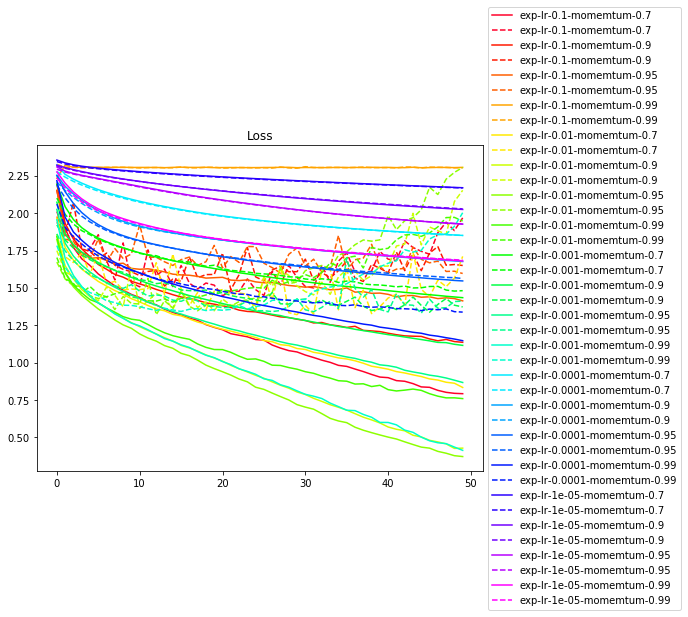

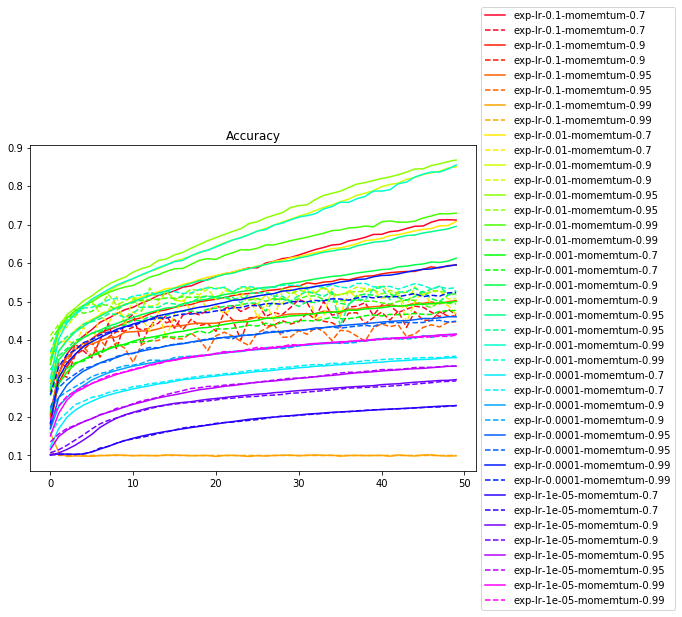

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
#color_bar = ["r", "g", "b", "y", "m"]*5
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()